In [1]:
import pyarrow.parquet as pq
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [2]:
prom_file_path = "/mnt/sdc/xiaoyu/prom_slurm_combined_2.parquet/part-00000-b1932c3a-10d1-431b-8f79-b0fc2046cc98-c000.snappy.parquet"
data = pd.read_parquet(prom_file_path)


In [3]:
columns_to_convert = ['numnodes', 'numcores', 'submit'] 

# Convert each column to numeric
for col in columns_to_convert:
    data[col] = pd.to_numeric(data[col])

data[columns_to_convert] = data[columns_to_convert].astype(float)

In [4]:
data.info(max_cols=100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461500 entries, 0 to 461499
Data columns (total 98 columns):
 #   Column                                          Non-Null Count   Dtype         
---  ------                                          --------------   -----         
 0   prom_id                                         461500 non-null  object        
 1   timestamp                                       461500 non-null  datetime64[ns]
 2   prom_node                                       461500 non-null  object        
 3   node_time_seconds                               461500 non-null  float64       
 4   node_load15                                     461500 non-null  float64       
 5   surfsara_power_usage                            461500 non-null  float64       
 6   up                                              461500 non-null  float64       
 7   node_netstat_Tcp_OutSegs                        461500 non-null  float64       
 8   node_netstat_Tcp_InErrs           

In [5]:
data.head(10)

,prom_id,timestamp,prom_node,node_time_seconds,node_load15,surfsara_power_usage,up,node_netstat_Tcp_OutSegs,node_netstat_Tcp_InErrs,node_context_switches_total,...,nodetypes,numnodes,numcores,submit,state,__index_level_0__,nodez,slurm_dayofyear_start,slurm_dayofyear_running,dayofyear_end
0,7247237,2022-07-04 07:36:00,r10n1,1.656930e+09,0.01,36.0,1.0,4.441490e+10,3.0,5.004180e+11,...,normal(1),1.0,16.0,1.656927e+09,TIMEOUT,1092068,[r10n1],185,185,190
1,7247238,2022-07-04 07:36:30,r10n1,1.656930e+09,0.04,92.0,1.0,4.441500e+10,3.0,5.004180e+11,...,normal(1),1.0,16.0,1.656927e+09,TIMEOUT,1092068,[r10n1],185,185,190
2,7247239,2022-07-04 07:37:00,r10n1,1.656930e+09,0.07,92.0,1.0,4.441500e+10,3.0,5.004180e+11,...,normal(1),1.0,16.0,1.656927e+09,TIMEOUT,1092068,[r10n1],185,185,190
3,7247240,2022-07-04 07:37:30,r10n1,1.656930e+09,0.10,92.0,1.0,4.441500e+10,3.0,5.004180e+11,...,normal(1),1.0,16.0,1.656927e+09,TIMEOUT,1092068,[r10n1],185,185,190
4,7247241,2022-07-04 07:38:00,r10n1,1.656930e+09,0.32,92.0,1.0,4.441510e+10,3.0,5.004180e+11,...,normal(1),1.0,16.0,1.656927e+09,TIMEOUT,1092068,[r10n1],185,185,190
5,7247242,2022-07-04 07:38:30,r10n1,1.656930e+09,1.21,92.0,1.0,4.441510e+10,3.0,5.004210e+11,...,normal(1),1.0,16.0,1.656927e+09,TIMEOUT,1092068,[r10n1],185,185,190
6,7247243,2022-07-04 07:39:00,r10n1,1.656930e+09,2.16,92.0,1.0,4.441510e+10,3.0,5.004230e+11,...,normal(1),1.0,16.0,1.656927e+09,TIMEOUT,1092068,[r10n1],185,185,190
7,7247244,2022-07-04 07:39:30,r10n1,1.656930e+09,2.66,92.0,1.0,4.441510e+10,3.0,5.004230e+11,...,normal(1),1.0,16.0,1.656927e+09,TIMEOUT,1092068,[r10n1],185,185,190
8,7247245,2022-07-04 07:40:00,r10n1,1.656930e+09,3.22,92.0,1.0,4.441510e+10,3.0,5.004240e+11,...,normal(1),1.0,16.0,1.656927e+09,TIMEOUT,1092068,[r10n1],185,185,190
9,7247246,2022-07-04 07:40:30,r10n1,1.656930e+09,3.99,128.0,1.0,4.441510e+10,3.0,5.004270e+11,...,normal(1),1.0,16.0,1.656927e+09,TIMEOUT,1092068,[r10n1],185,185,190


In [6]:
data = data.drop(columns = ['timestamp', 'prom_node', 'prom_id', 'slurm_node', 'nodez', 'nodetypes', 'start_date', 'end_date'])

In [7]:
data.state.value_counts()

state
COMPLETED        256843
TIMEOUT          174853
CANCELLED         13435
NODE_FAIL         10670
FAILED             4376
OUT_OF_MEMORY      1323
Name: count, dtype: int64

In [8]:
label_encoder = LabelEncoder()
data['state_encoded'] = label_encoder.fit_transform(data['state'])


/home/yizhen/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/yizhen/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [9]:
data = data.drop(columns=['state'])

In [10]:
# Pearson correlation
pearson_corr = data.corr(method='pearson')
pearson_corr_state = pearson_corr['state_encoded']


In [11]:
# Spearman correlation
spearman_corr = data.corr(method='spearman')
spearman_corr_state = spearman_corr['state_encoded']

In [12]:
def plot_correlation(correlation_data, title):

    plt.figure(figsize=(20, 20))
    correlation_data.sort_values().plot(kind='barh')
    plt.title(title)
    plt.ylabel('Correlation Coefficient')
    plt.grid()
    plt.show()

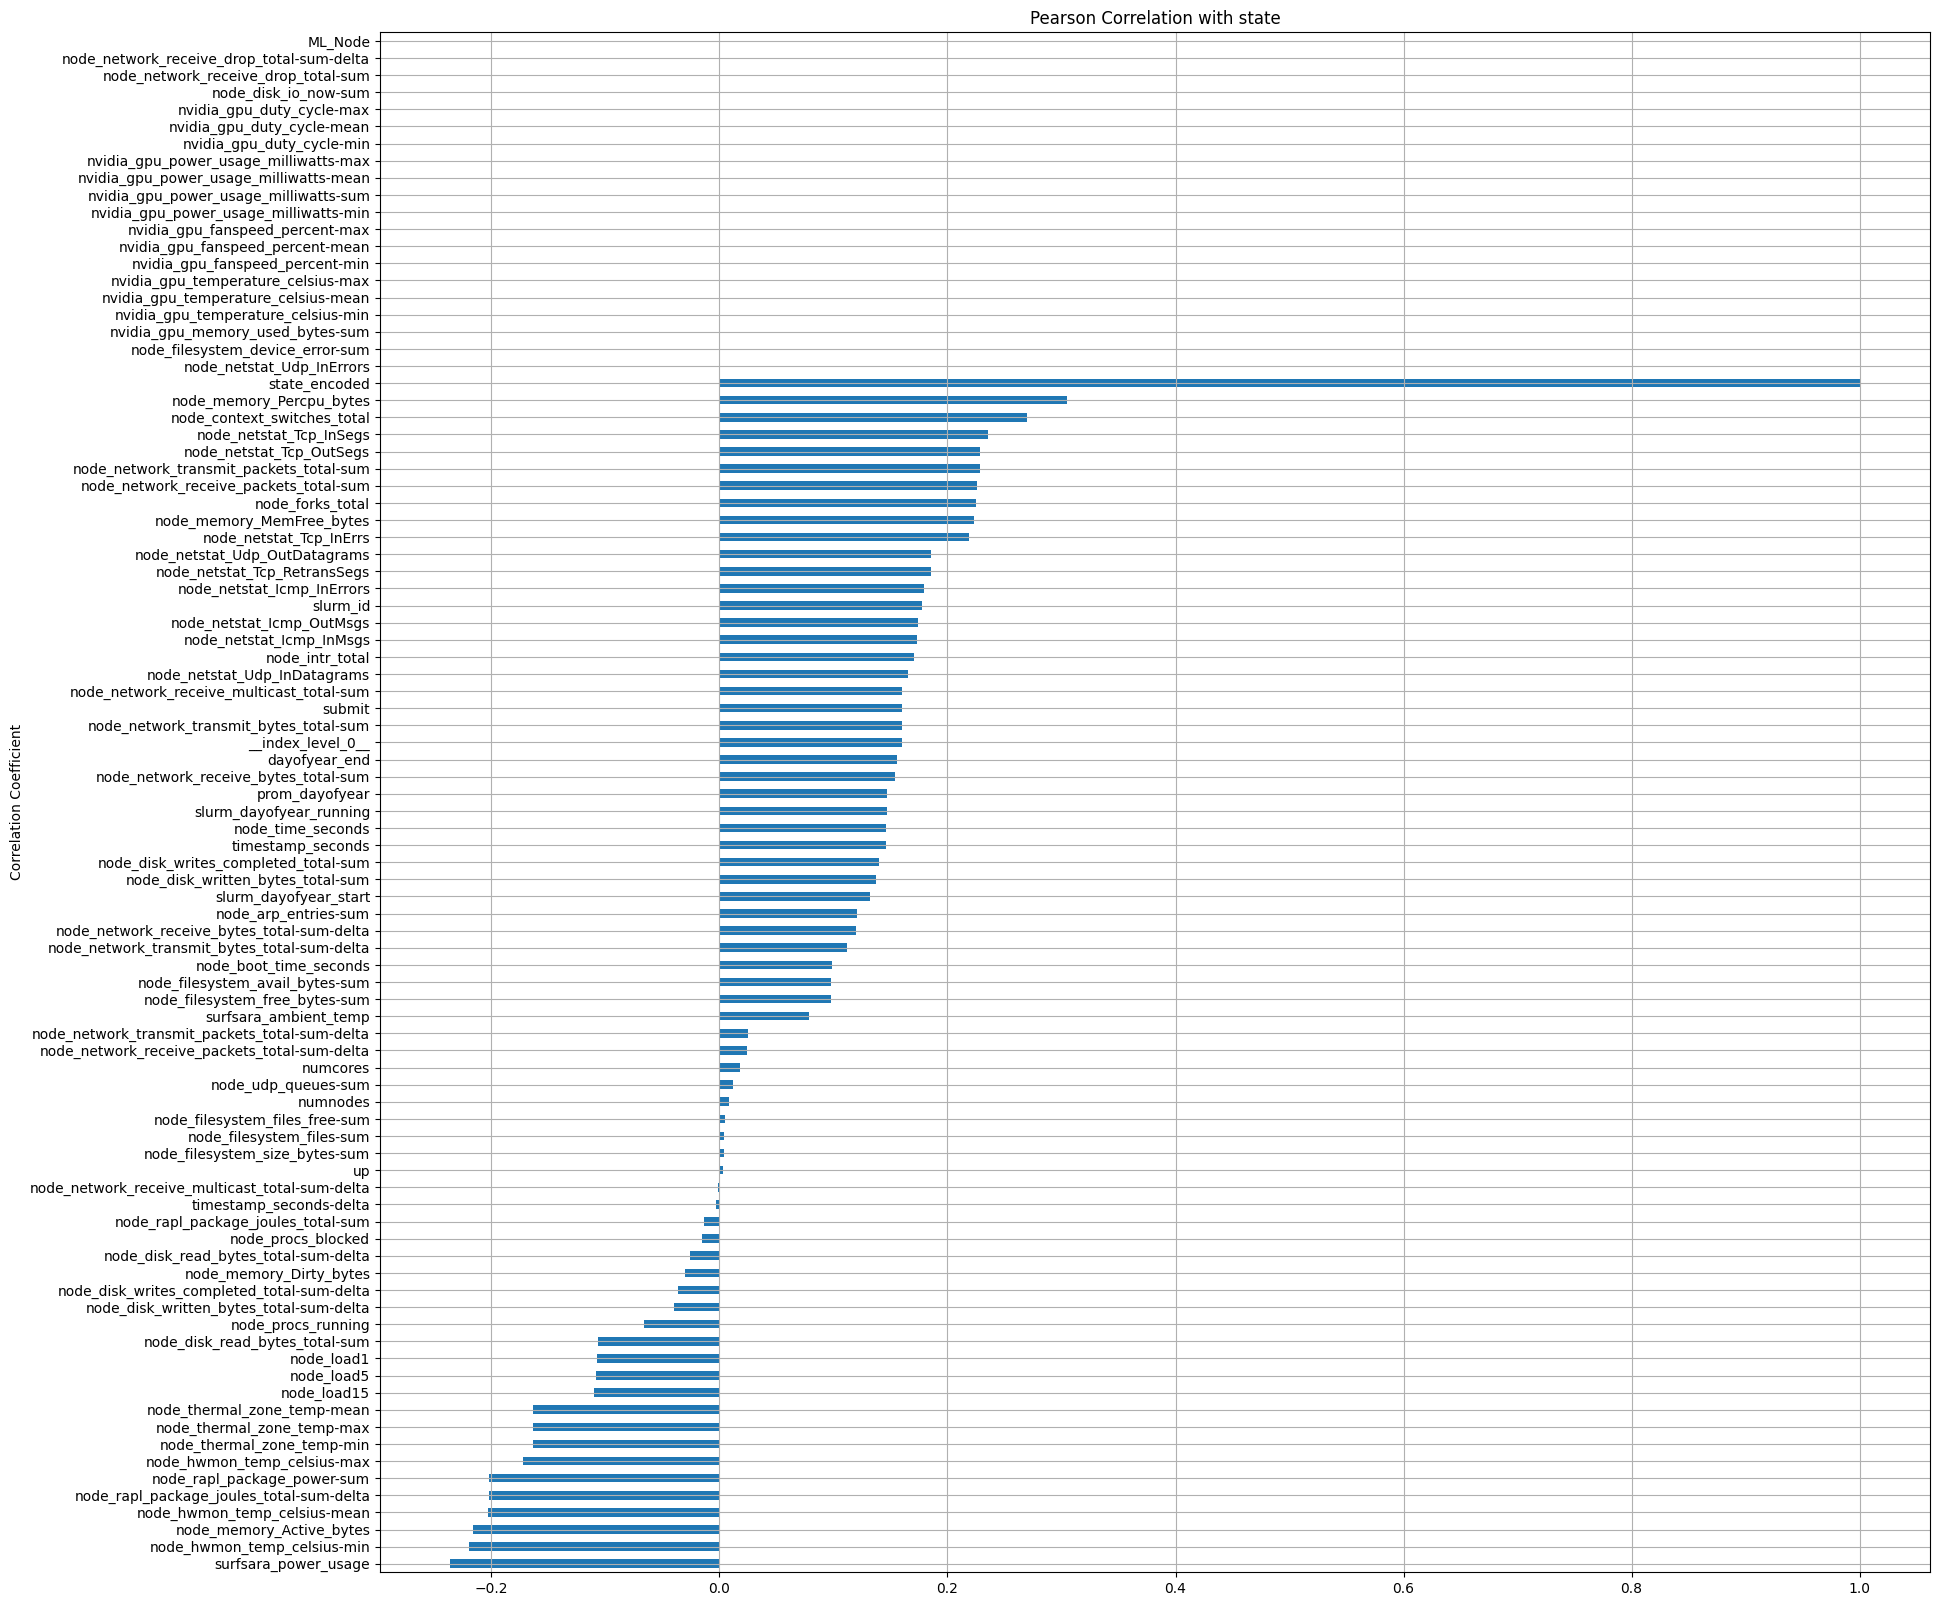

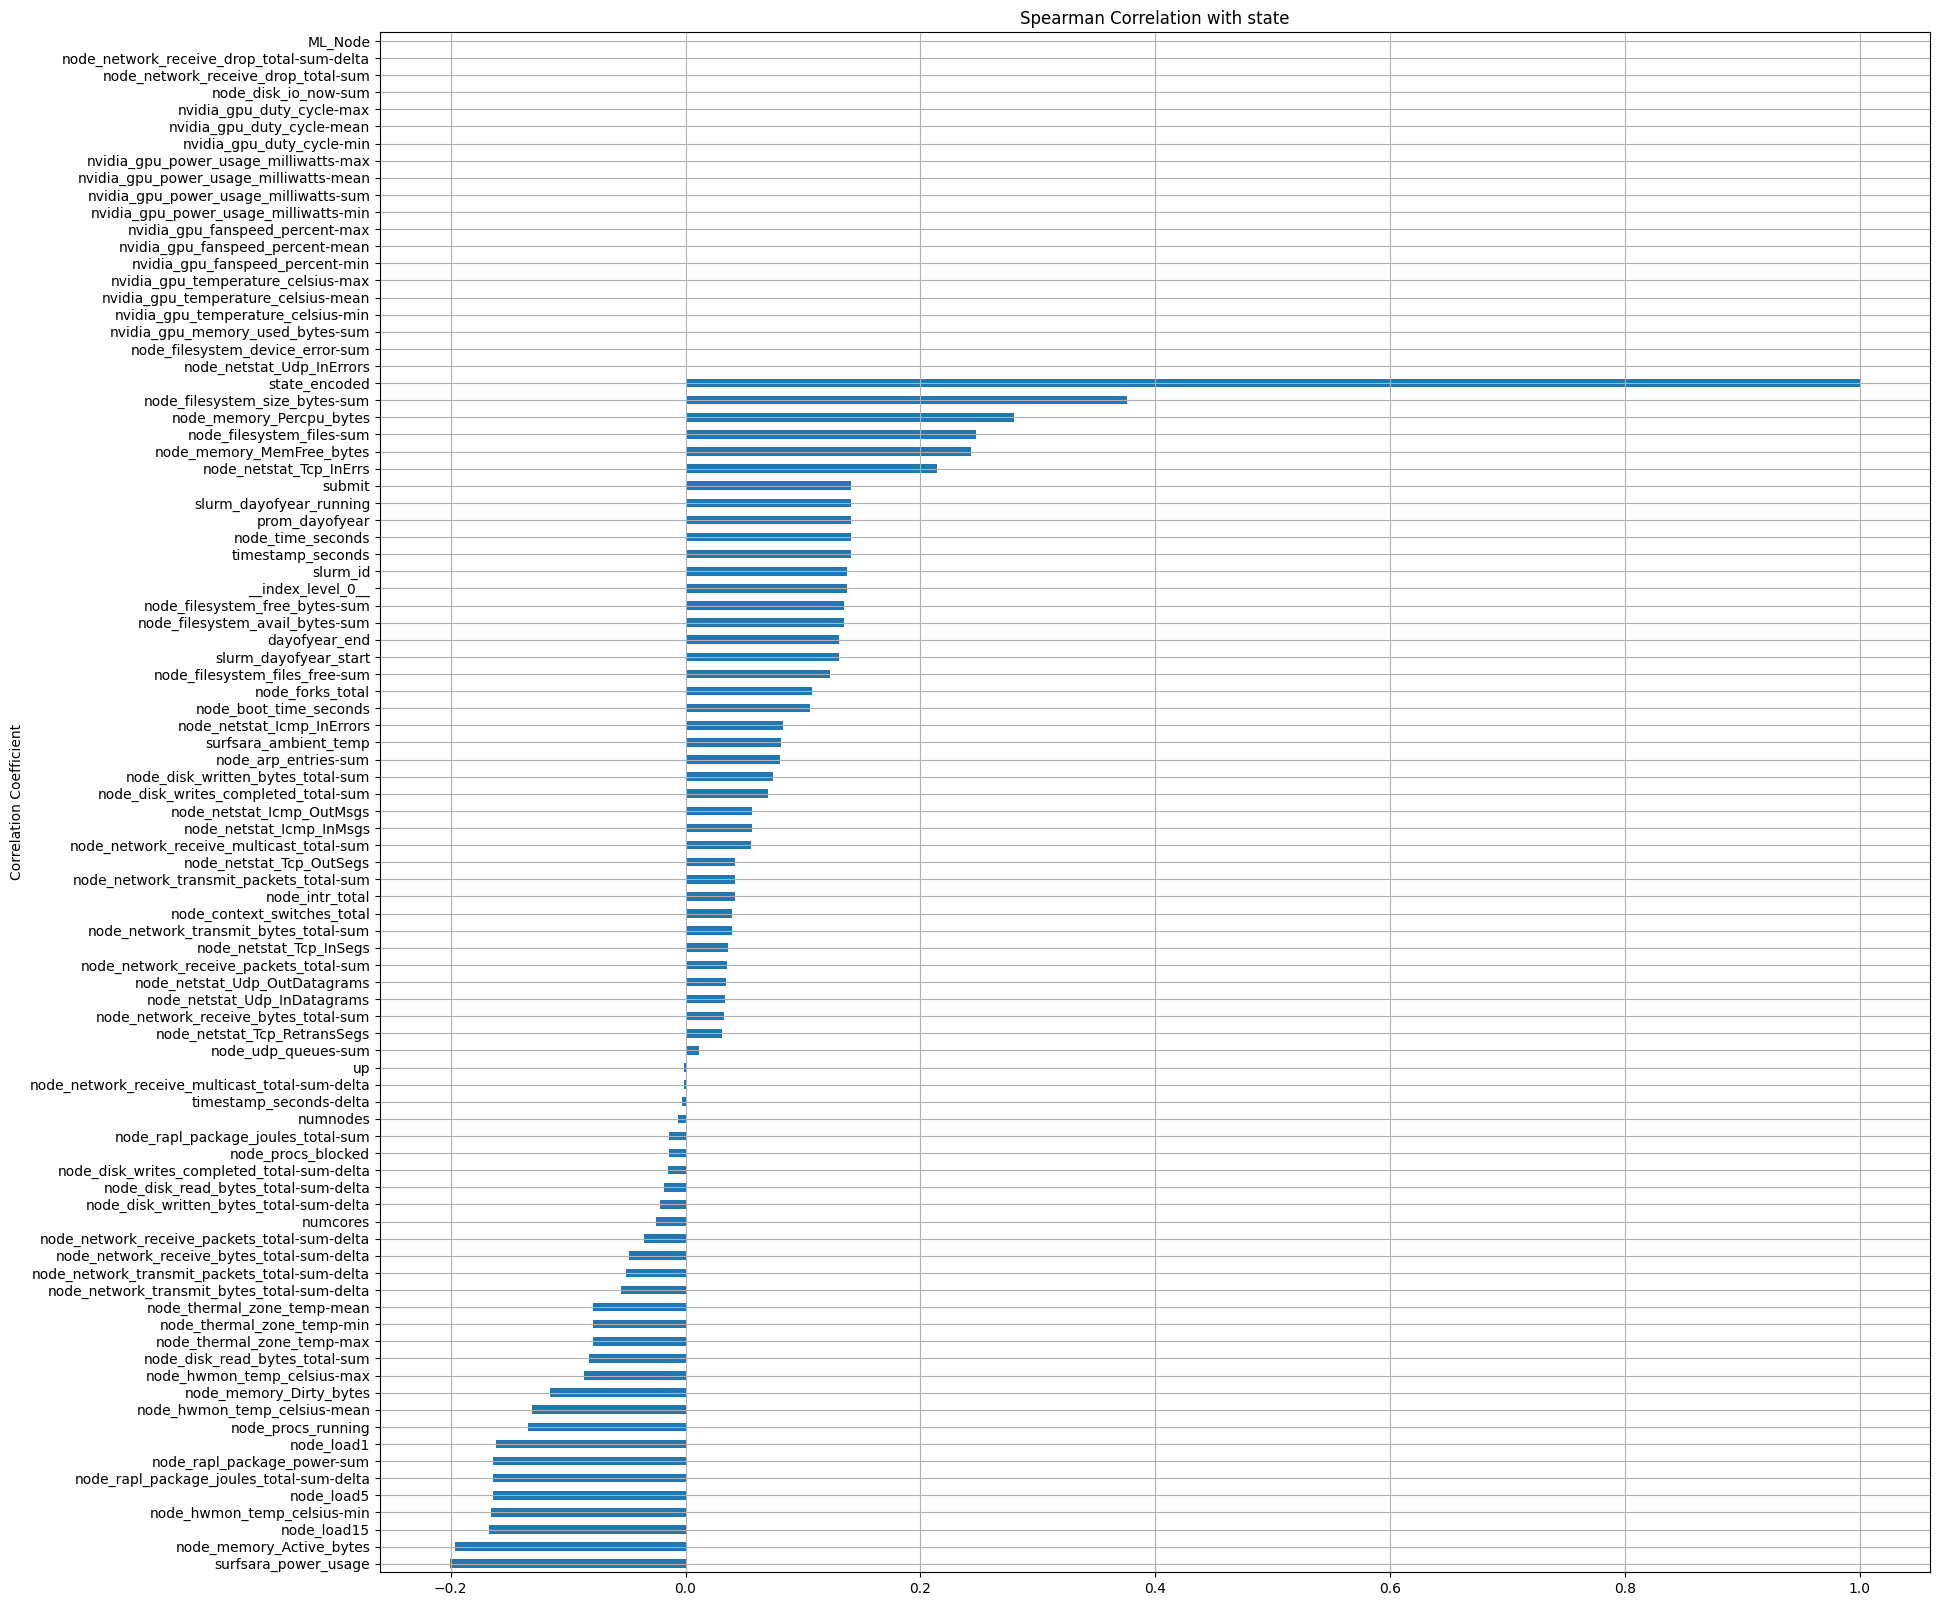

In [13]:
plot_correlation(pearson_corr_state, "Pearson Correlation with state")

plot_correlation(spearman_corr_state, "Spearman Correlation with state")


In [17]:
pearson_sorted_corr_state = pearson_corr_state.abs().sort_values(ascending = False)

# Select the top 15 rows
pearson_top_15_corr_state = pearson_sorted_corr_state.head(16)

# Display the top 15 columns with the highest absolute correlation coefficients
print(pearson_top_15_corr_state)
print("\n")

spearman_sorted_corr_state = spearman_corr_state.abs().sort_values(ascending = False)

# Select the top 15 rows
spearman_top_15_corr_state = spearman_sorted_corr_state.head(16)

# Display the top 15 columns with the highest absolute correlation coefficients
print(spearman_top_15_corr_state)


state_encoded                               1.000000
node_memory_Percpu_bytes                    0.305023
node_context_switches_total                 0.269748
surfsara_power_usage                        0.235929
node_netstat_Tcp_InSegs                     0.235810
node_netstat_Tcp_OutSegs                    0.228926
node_network_transmit_packets_total-sum     0.228873
node_network_receive_packets_total-sum      0.225545
node_forks_total                            0.225431
node_memory_MemFree_bytes                   0.222904
node_hwmon_temp_celsius-min                 0.219957
node_netstat_Tcp_InErrs                     0.219276
node_memory_Active_bytes                    0.216455
node_hwmon_temp_celsius-mean                0.203056
node_rapl_package_joules_total-sum-delta    0.202044
node_rapl_package_power-sum                 0.201912
Name: state_encoded, dtype: float64


state_encoded                               1.000000
node_filesystem_size_bytes-sum              0.376402
node_mem

In [15]:
# node_memory_Percpu_bytes
# node_context_switches_total
# surfsara_power_usage
# node_netstat_Tcp_InSegs
# node_netstat_Tcp_OutSegs
# node_network_transmit_packets_total-sum

# node_filesystem_size_bytes-sum    
# node_filesystem_files-sum
# node_memory_MemFree_bytes
# node_netstat_Tcp_InErrs

In [1]:
# 'node_netstat_Tcp_OutSegs','node_netstat_Tcp_RetransSegs','node_intr_total','node_netstat_Tcp_InSegs','node_procs_running','node_hwmon_temp_celsius-mean','node_network_transmit_bytes_total-sum','node_thermal_zone_temp-mean','node_arp_entries-sum','node_network_transmit_packets_total-sum','node_network_receive_bytes_total-sum','node_network_receive_packets_total-sum'
# 'node_netstat_Tcp_OutSegs','node_netstat_Tcp_RetransSegs','node_intr_total','node_netstat_Tcp_InSegs','node_procs_running','node_hwmon_temp_celsius-mean','node_network_transmit_bytes_total-sum','node_thermal_zone_temp-mean','node_arp_entries-sum','node_network_transmit_packets_total-sum','node_network_receive_bytes_total-sum','node_network_receive_packets_total-sum','jobID', 'TIMEOUT', 'COMPLETED','CANCELLED', 'FAILED', 'OUT_OF_MEMORY', 'NODE_FAIL', 'jobCount_30s','TIMEOUT_30s', 'COMPLETED_30s', 'CANCELLED_30s', 'FAILED_30s','OUT_OF_MEMORY_30s', 'NODE_FAIL_30s'
